<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Краткое-описание" data-toc-modified-id="Краткое-описание-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Краткое описание</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>План работы</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Исследование-финальной-модели" data-toc-modified-id="Исследование-финальной-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование финальной модели</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

## Описание проекта

### Краткое описание

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

***Цель проекта:*** построить модель с максимальным значением F1-меры (не менее 0.59)

### Описание данных

***Признаки***

* `RowNumber` — индекс строки в данных

* `CustomerId` — уникальный идентификатор клиента

* `Surname` — фамилия

* `CreditScore` — кредитный рейтинг

* `Geography` — страна проживания

* `Gender` — пол

* `Age` — возраст

* `Tenure` — сколько лет человек является клиентом банка

* `Balance` — баланс на счёте

* `NumOfProducts` — количество продуктов банка, используемых клиентом

* `HasCrCard` — наличие кредитной карты

* `IsActiveMember` — активность клиента

* `EstimatedSalary` — предполагаемая зарплата


***Целевой признак***

* `Exited` — факт ухода клиента

### План работы

1. Подготовка данных:
    - загрузка;
    - предобработка;
    - подготовка признаков;
    
    
2. Исследование задачи:
    - баланс классов;
    - обучение моделей в условиях дисбаланса;
    
    
3. Борьба с дисбалансом:
    - взвешивание классов, upsampling, downsampling, threshold;
    - обучение разных моделей, выбор лучшей;


4. Исследование финальной модели:
    - подбор гиперпараметров;
    - обучение финальной модели;
    - анализ финальных метрик;


5. Тестирование модели.
    - тестирование и расчет метрик качества;



6. Общий вывод.

## Подготовка данных

### Загрузка данных

In [15]:
# Установим пару недостающих библиотек

!pip install inflection
!pip install optuna

In [16]:
# Импортируем необходимые библиотеки

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from inflection import underscore
import seaborn as sns
import optuna
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import (accuracy_score,
                             precision_score, 
                             recall_score, 
                             f1_score, 
                             roc_auc_score,
                             precision_recall_curve,
                             roc_curve)

In [17]:
# Уберем предупреждения

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Сохраним исходный датафрейм в переменной df

pth1 = 'C:\\Users\\mpeat\\Desktop\\Practicum_Data_Science\\2 Modul\\Обучение с учителем\\Project\\Churn.csv'
pth2 = 'https://code.s3.yandex.net/datasets/Churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
else:
    df = pd.read_csv(pth2)

### Предобработка данных

In [19]:
df.head() # первые 5 строк таблицы

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [20]:
df.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Предварительно обнаружено 2 проблемы:
* Названия колонок не приведены к змеиному_регистру.
* В столбце `tenure` есть пропуски.

In [21]:
# Приведем названия колонок к змеиному_регистру

df.columns = [underscore(column) for column in df.columns]
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [22]:
# Проверим наличие дубликатов

df.duplicated().sum()

0

In [23]:
df.tenure.isna().sum() # количество пропусков в 'tenure'

909

In [24]:
df.tenure.value_counts() # распределение значений по столбцу 'tenure'

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

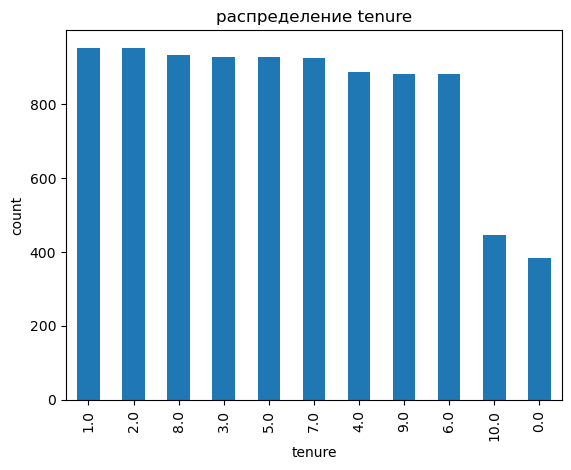

In [25]:
df.tenure.value_counts().plot.bar() # графическое распределение 'tenure'
plt.title('распределение tenure')
plt.xlabel('tenure')
plt.ylabel('count')
None

Всего в столбце `tenure` ***909*** пропусков. Распределение значений в данном столбце равномерное, кроме последних 2 баров. Возможно пропуски являются причиной искажения распределения `tenure`, и заполнив их значениями ***0 и 10***, распределение будет иметь более правильный вид.

Cреднее значение распределения примерно 900 единиц. Тогда дефицит составляет (900-446) + (900-382) = ***972***, что сопоставимо с количеством пропусков.

Таким образом, можно заполнить пропуски значениями ***0*** (500 шт) и ***10*** (остальные прпуски) случайным образом, в нужных объемах.

Перед устранением пропусков, посмотрим описание данных всей таблицы и по отдельным срезам.

In [26]:
df.describe() # весь датафрейм

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
df.query('tenure.isna()').describe() # строки с пропусками в 'tenure'

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,909.000000,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,4866.386139,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,2909.604343,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,31.000000,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2311.000000,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,4887.000000,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,7306.000000,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


In [28]:
df.query('tenure == 0').describe() # строки с нулями в 'tenure'

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,382.000000,3.820000e+02,382.000000,382.000000,382.0,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,5089.172775,1.569618e+07,651.913613,39.306283,0.0,80135.307277,1.437173,0.651832,0.531414,99565.395157,0.235602
std,2821.087244,7.187497e+04,95.741781,10.418181,0.0,62233.212461,0.522442,0.477014,0.499667,57360.554103,0.424931
min,30.000000,1.556647e+07,350.000000,19.000000,0.0,0.000000,1.000000,0.000000,0.000000,332.810000,0.000000
25%,2626.750000,1.563546e+07,592.250000,32.000000,0.0,0.000000,1.000000,0.000000,0.000000,47574.687500,0.000000
50%,5107.500000,1.569641e+07,653.000000,38.000000,0.0,101050.445000,1.000000,1.000000,1.000000,102160.510000,0.000000
75%,7503.500000,1.575880e+07,714.750000,44.750000,0.0,129638.762500,2.000000,1.000000,1.000000,149577.825000,0.000000
max,9920.000000,1.581553e+07,850.000000,79.000000,0.0,197041.800000,3.000000,1.000000,1.000000,199478.050000,1.000000


In [29]:
df.query('tenure == 10').describe() # строки с десятками в 'tenure'

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,446.000000,4.460000e+02,446.000000,446.000000,446.0,446.000000,446.00000,446.000000,446.000000,446.000000,446.000000
mean,5176.634529,1.569081e+07,651.670404,39.195067,10.0,73580.495964,1.56278,0.708520,0.515695,102841.772040,0.206278
std,3000.955284,6.997167e+04,97.139475,10.922817,0.0,60388.092662,0.61029,0.454954,0.500315,56672.191811,0.405087
min,13.000000,1.556580e+07,350.000000,18.000000,10.0,0.000000,1.00000,0.000000,0.000000,123.070000,0.000000
25%,2691.500000,1.563047e+07,586.250000,32.000000,10.0,0.000000,1.00000,0.000000,0.000000,53353.340000,0.000000
50%,5158.500000,1.569292e+07,651.500000,38.000000,10.0,92327.835000,2.00000,1.000000,1.000000,101505.860000,0.000000
75%,7867.000000,1.575041e+07,720.000000,44.000000,10.0,123729.105000,2.00000,1.000000,1.000000,149669.367500,0.000000
max,9997.000000,1.581553e+07,850.000000,88.000000,10.0,200724.960000,4.00000,1.000000,1.000000,199775.670000,1.000000


In [30]:
df.tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [31]:
# Убираем пропуски

df.tenure = df.tenure.mask(df.tenure.isna(),
                           np.random.uniform(1, 10, size=len(df.tenure)).round())

In [32]:
df.tenure.value_counts()

2.0     1061
3.0     1043
8.0     1041
7.0     1041
5.0     1013
1.0     1009
4.0      979
9.0      976
6.0      963
10.0     492
0.0      382
Name: tenure, dtype: int64

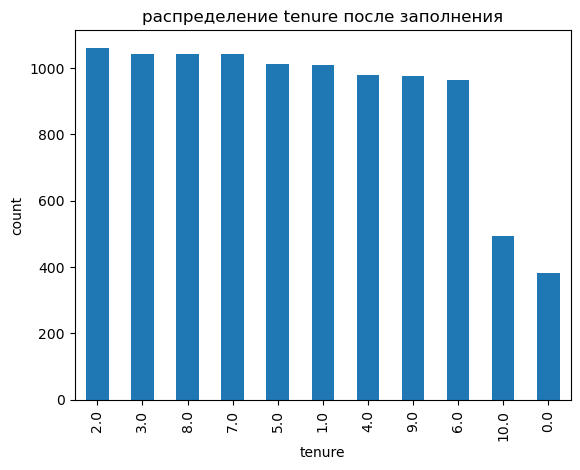

In [33]:
df.tenure.value_counts().plot.bar() # смотрим распределение после заполнения
plt.title('распределение tenure после заполнения')
plt.xlabel('tenure')
plt.ylabel('count')
None

Распределение принципиально не изменилось.

In [34]:
df.query('tenure == 0').describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,382.000000,3.820000e+02,382.000000,382.000000,382.0,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,5089.172775,1.569618e+07,651.913613,39.306283,0.0,80135.307277,1.437173,0.651832,0.531414,99565.395157,0.235602
std,2821.087244,7.187497e+04,95.741781,10.418181,0.0,62233.212461,0.522442,0.477014,0.499667,57360.554103,0.424931
min,30.000000,1.556647e+07,350.000000,19.000000,0.0,0.000000,1.000000,0.000000,0.000000,332.810000,0.000000
25%,2626.750000,1.563546e+07,592.250000,32.000000,0.0,0.000000,1.000000,0.000000,0.000000,47574.687500,0.000000
50%,5107.500000,1.569641e+07,653.000000,38.000000,0.0,101050.445000,1.000000,1.000000,1.000000,102160.510000,0.000000
75%,7503.500000,1.575880e+07,714.750000,44.750000,0.0,129638.762500,2.000000,1.000000,1.000000,149577.825000,0.000000
max,9920.000000,1.581553e+07,850.000000,79.000000,0.0,197041.800000,3.000000,1.000000,1.000000,199478.050000,1.000000


In [35]:
df.query('tenure == 10').describe()

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,492.000000,4.920000e+02,492.000000,492.000000,492.0,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,5186.762195,1.568931e+07,652.264228,39.103659,10.0,74961.265996,1.558943,0.701220,0.518293,103497.397561,0.203252
std,2990.586128,7.024262e+04,99.526861,10.860879,0.0,61297.649261,0.607641,0.458189,0.500174,56424.767489,0.402828
min,13.000000,1.556580e+07,350.000000,18.000000,10.0,0.000000,1.000000,0.000000,0.000000,123.070000,0.000000
25%,2678.750000,1.562874e+07,583.000000,32.000000,10.0,0.000000,1.000000,0.000000,0.000000,54067.832500,0.000000
50%,5186.000000,1.569072e+07,649.500000,38.000000,10.0,95103.030000,2.000000,1.000000,1.000000,102387.790000,0.000000
75%,7855.000000,1.574901e+07,723.250000,44.000000,10.0,124671.597500,2.000000,1.000000,1.000000,150938.477500,0.000000
max,9997.000000,1.581553e+07,850.000000,88.000000,10.0,206663.750000,4.000000,1.000000,1.000000,199775.670000,1.000000


Принципиально заполнение пропусков не сказалось на распределении в датафрейме.

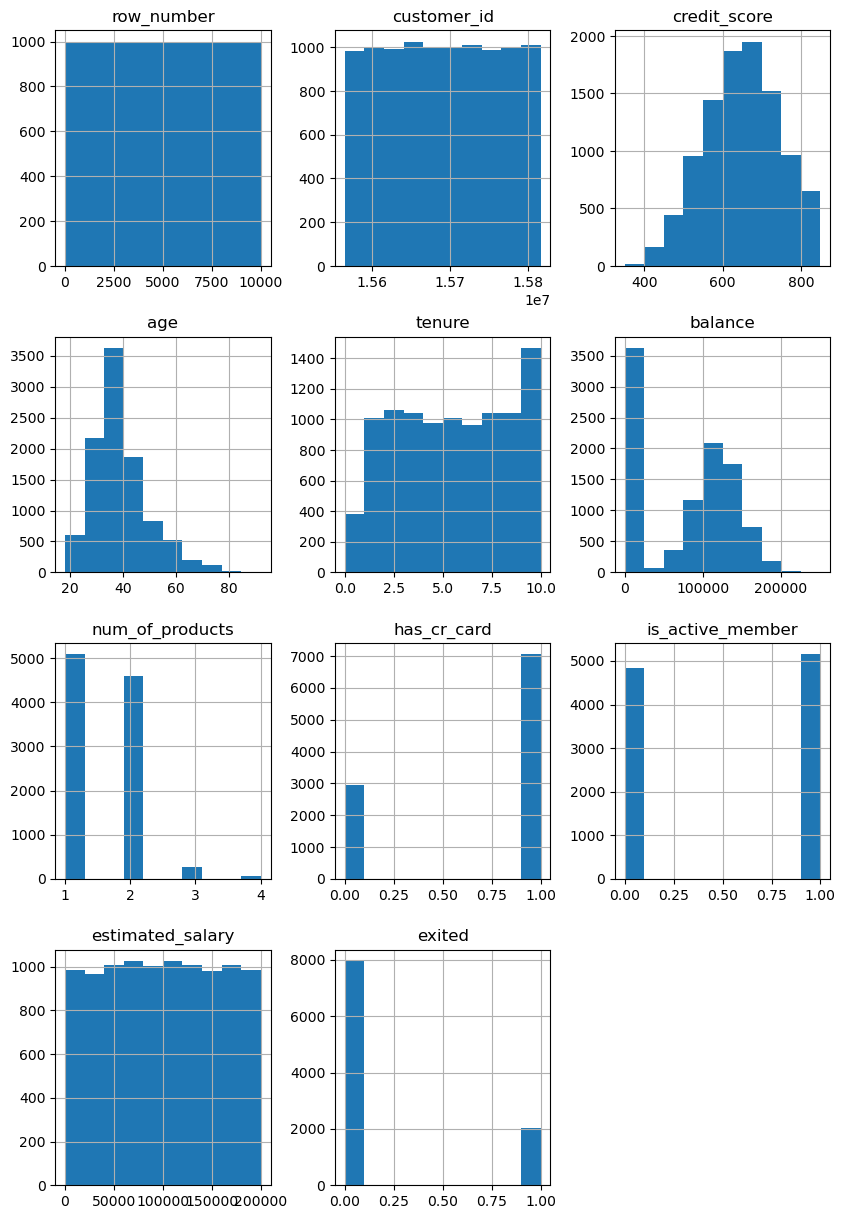

In [36]:
# Проверим наличие выбросов

df.hist(figsize=(10, 15))
None

Видим выбросы в колонке с балансом.

In [37]:
df.balance.value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: balance, Length: 6382, dtype: int64

Больше трети клиентов имеет нулевой баланс. Данное значение хоть и похоже на аномалию, но скорее всего ей не является, т.к. много клиентов могут быть номинальными и не пользоваться продуктами банка. Оставим все как есть.


По остальным гистограммам вопросов нет.

### Подготовка признаков

In [38]:
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


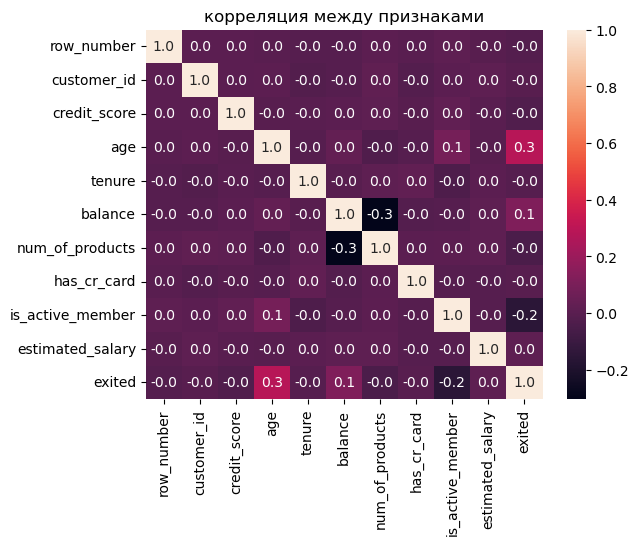

In [39]:
# Проверим наличие корреляции между признаками

sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.title('корреляция между признаками')
None

Максимальное значения 0,3, что считается слабой корреляцией, а значит линейной зависимости между признаками практически нет. 

Столбцы `'row_number'`, `'customer_id'`, `'surname'` содержат идентификационную информацию об объекте. Полезной нагрузки для определения таргета в них нет, значит можно избавиться от данных признаков.

In [40]:
# Избавимся от лишних признаков

df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

In [41]:
df.head(3)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


В нашем датафрейме есть 2 категориальных признака(`geography`, `gender`). Для обучения модели их нужно закодировать. Используем OneHotEncoding(OHE)

In [42]:
# Закодируем категориальные признаки

df = pd.get_dummies(df, drop_first=1) # drop_first=1 предотвращает мультиколлинеарность(дамми-ловушку)
df.head(3)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


In [43]:
# Отделим целевой признак от остальлных в отдельные переменные

target = df.exited # целевой признак
features = df.drop(columns='exited') # остальные признаки

In [44]:
# Разделим выборку на обучающую, валидацинную и тестовую

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=1234)
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size=0.5, random_state=1234)

# Выведем размер выборок для проверки
print((features_train.shape, features_valid.shape, features_test.shape), (target_train.shape, target_valid.shape, target_test.shape), sep='\n')

((6000, 11), (2000, 11), (2000, 11))
((6000,), (2000,), (2000,))


Разделили выборки в соотношении 3:1:1 (train : valid : test)

In [45]:
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Для обучения модели необходимо масштабировать количественные признаки. Используем для этого метод стандартизации.

In [46]:
col_num = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary'] # масштабируемые признаки

In [47]:
# Создадим и обучим модель на тренировочной выборке для стандартизации

scaler = StandardScaler()
scaler.fit(features_train[col_num])

StandardScaler()

In [48]:
# Масштабируем наши фичи

features_train[col_num] = scaler.transform(features_train[col_num])
features_valid[col_num] = scaler.transform(features_valid[col_num])
features_test[col_num] = scaler.transform(features_test[col_num])

Посмотрим результаты масштабирования.

In [49]:
pd.options.display.float_format = '{:,.2f}'.format # формат отображения 2 знака после запятой

features_train


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
count,"6,000.00","6,000.00","6,000.00","6,000.00","6,000.00","6,000.00","6,000.00","6,000.00","6,000.00","6,000.00","6,000.00"
mean,-0.00,0.00,0.00,-0.00,0.00,0.70,0.51,0.00,0.25,0.25,0.54
std,1.00,1.00,1.00,1.00,1.00,0.46,0.50,1.00,0.43,0.43,0.50
min,-3.09,-2.02,-1.74,-1.23,-0.91,0.00,0.00,-1.74,0.00,0.00,0.00
25%,-0.69,-0.67,-0.70,-1.23,-0.91,0.00,0.00,-0.85,0.00,0.00,0.00
50%,0.01,-0.19,-0.01,0.33,-0.91,1.00,1.00,0.00,0.00,0.00,1.00
75%,0.69,0.48,1.03,0.82,0.82,1.00,1.00,0.85,1.00,0.00,1.00
max,2.05,5.09,1.72,2.59,4.29,1.00,1.00,1.74,1.00,1.00,1.00


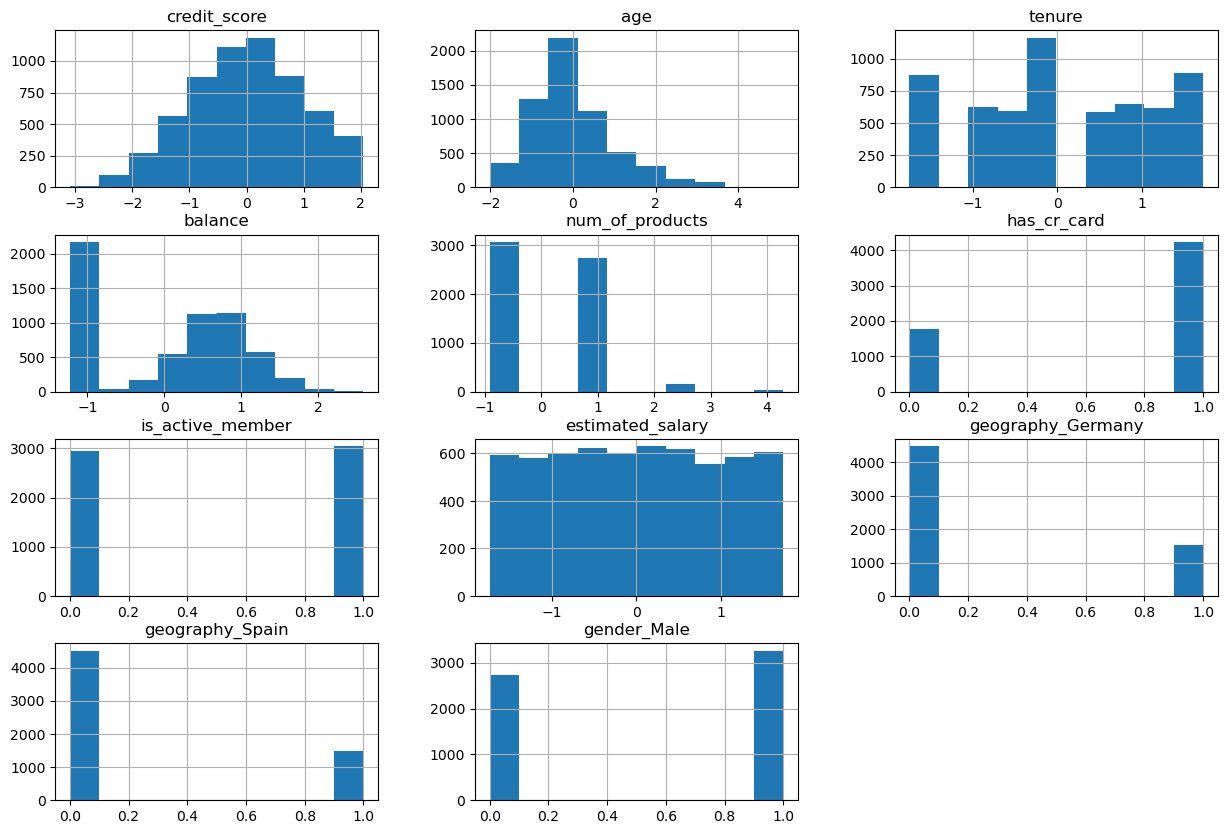

features_valid


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,-0.03,-0.02,-0.02,0.01,0.01,0.70,0.54,0.00,0.25,0.24,0.55
std,0.99,1.03,0.99,0.99,1.01,0.46,0.50,1.00,0.43,0.42,0.50
min,-2.92,-2.02,-1.74,-1.23,-0.91,0.00,0.00,-1.74,0.00,0.00,0.00
25%,-0.73,-0.67,-0.70,-1.23,-0.91,0.00,0.00,-0.84,0.00,0.00,0.00
50%,-0.01,-0.19,-0.01,0.31,-0.91,1.00,1.00,0.01,0.00,0.00,1.00
75%,0.66,0.48,0.68,0.83,0.82,1.00,1.00,0.88,0.00,0.00,1.00
max,2.05,4.42,1.72,2.79,4.29,1.00,1.00,1.74,1.00,1.00,1.00


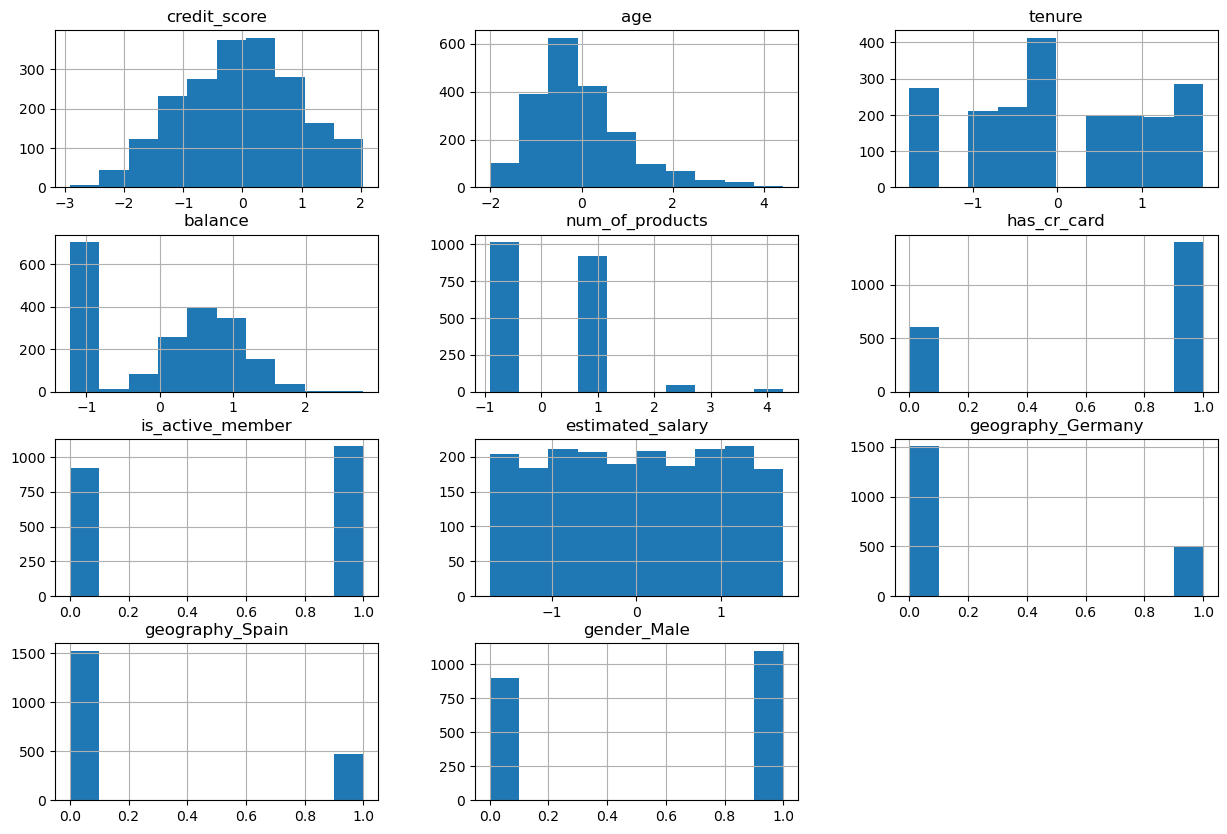

features_test


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,0.01,-0.01,0.02,-0.02,0.03,0.71,0.51,0.01,0.25,0.26,0.55
std,0.98,1.01,0.99,1.00,1.03,0.45,0.50,1.01,0.43,0.44,0.50
min,-3.09,-2.02,-1.74,-1.23,-0.91,0.00,0.00,-1.74,0.00,0.00,0.00
25%,-0.67,-0.67,-0.70,-1.23,-0.91,0.00,0.00,-0.86,0.00,0.00,0.00
50%,0.01,-0.19,-0.01,0.33,-0.91,1.00,1.00,0.01,0.00,0.00,1.00
75%,0.68,0.48,1.03,0.81,0.82,1.00,1.00,0.87,0.00,1.00,1.00
max,2.05,5.09,1.72,2.33,4.29,1.00,1.00,1.74,1.00,1.00,1.00


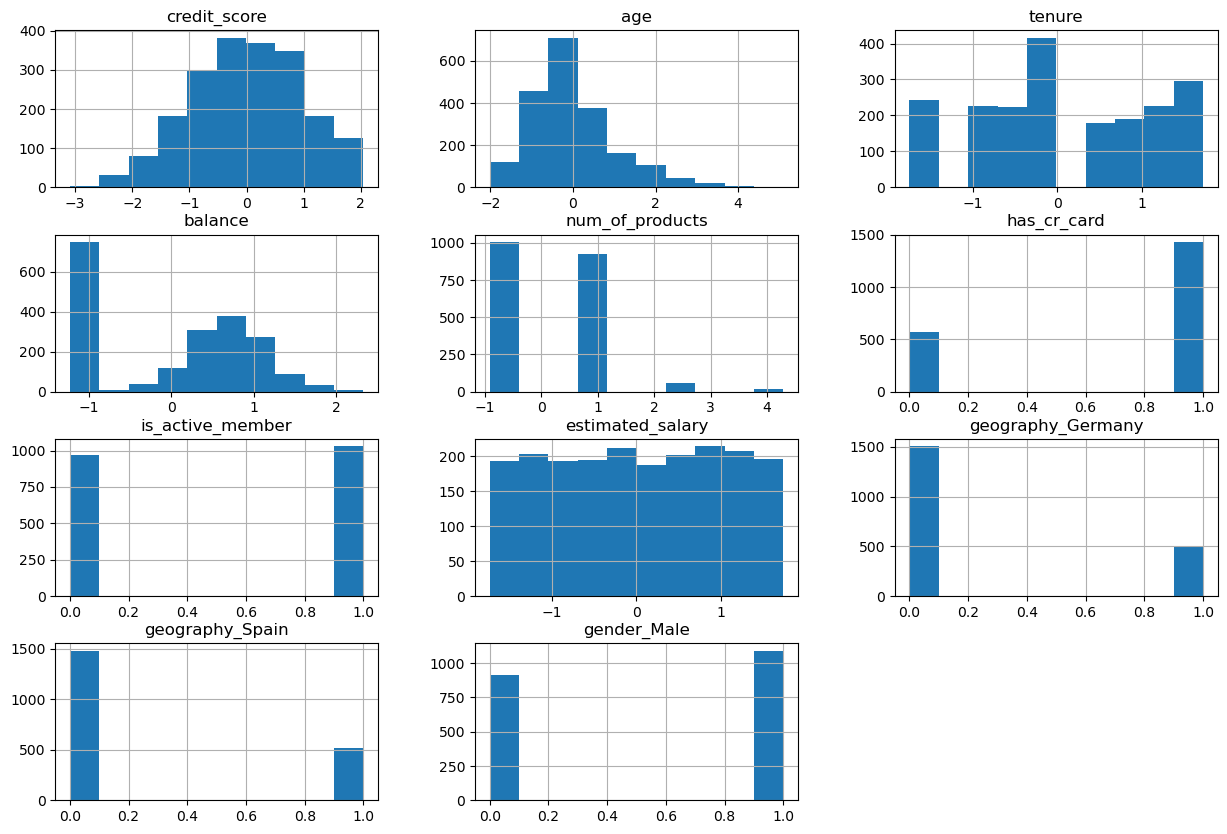

In [50]:
d = {'features_train': features_train, 'features_valid': features_valid, 'features_test':  features_test}
for ft in d:
    print(ft)
    display(d[ft].describe())
    d[ft].hist(figsize=(15, 10))
    plt.show()

Все признаки отмасштабированы. Можем двигаться дальше.

**Вывод:** При подготовке данных были выполнены следущие действия:
- загрузка данных;


- предобработка данных:
    - названия колонок приведены к змеиному_регистру;
    - заполнены пропуски;
    - проверка наличия дубликатов;
    
    
    
- подготовка признаков:
    - удалены лишние признаки;
    - закодированы категориальные признаки методом OHE;
    - стандартизированы количественные признаки;
    - выделен целевой признак в отдельную переменую `target`, ост признаки в `features`;
    - выборка разделена на тренировочную, валидационную, тестовую в пропорции 3:1:1.


## Исследование задачи

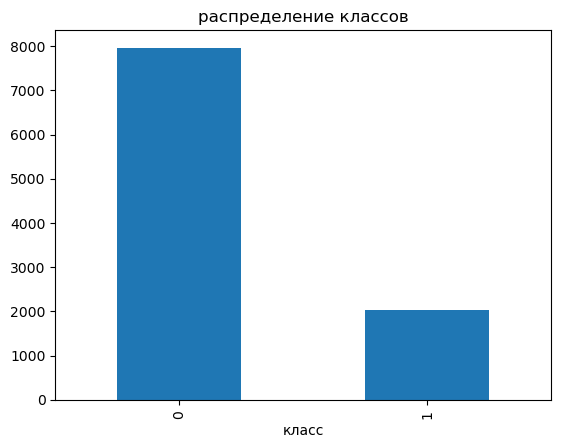

In [51]:
target.value_counts().plot.bar() # проверим баланс классов
plt.title('распределение классов')
plt.xlabel('класс')
None

Дисбаланс есть. Обучим модели и посмотрим метрики качества.

In [41]:
# Функция расчета метрик

def calculate_metrics(target, predict_proba):
    
    predict = (predict_proba[:, 1] > 0.5).astype('int')
    
    accuracy = accuracy_score(target, predict)
    precision = precision_score(target, predict)
    recall = recall_score(target, predict)
    roc_auc = roc_auc_score(target, predict_proba[:, 1])
    f1 = f1_score(target, predict)

    return [accuracy, precision, recall, roc_auc, f1]

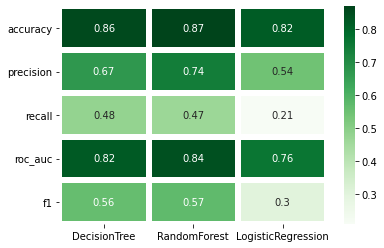

In [43]:
# Инициализируем модели

r = {'DecisionTree': [0]*5, 'RandomForest': [0]*5, 'LogisticRegression': [0]*5} # результирующий словарь

for depth in range(1, 16):
    model_dt0 = DecisionTreeClassifier(random_state=1234, max_depth=depth)  # решающее дерево
    model_dt0.fit(features_train, target_train)
    pred = model_dt0.predict_proba(features_valid)
    d = calculate_metrics(target_valid, pred)
    if d[-1] > r['DecisionTree'][-1]:
        r['DecisionTree'] = d
    
for est in range(10, 151, 10):    
    for depth in range(1, 16):
        model_rf0 = RandomForestClassifier(random_state=1234, max_depth=depth, n_estimators=est) # случайный лес
        model_rf0.fit(features_train, target_train)
        pred = model_rf0.predict_proba(features_valid)
        d = calculate_metrics(target_valid, pred)
        if d[-1] > r['RandomForest'][-1]:
            r['RandomForest'] = d    
            
model_lr0 = LogisticRegression(random_state=1234)      # логистическая регрессия   
model_lr0.fit(features_train, target_train)
pred = model_lr0.predict_proba(features_valid)
r['LogisticRegression'] = calculate_metrics(target_valid, pred)

# Выводим результат
res = pd.DataFrame(data=r, index=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])
sns.heatmap(res, annot=True, cmap='Greens', linewidth=5)
plt.yticks(rotation=0)
None

**Вывод:** На данном этапе исследования был выявлен **дисбаланс** классов. Объектов **класса 1** примерно **в 4 раза меньше**. Было обучено 3 модели при данном дисбалансе классов, посчитаны основные метрики. Лучший результат показала модель ***`случайного леса`***:

    accuracy: 0.87
    precision: 0.78
    recall: 0.45
    roc_auc: 0.85
    f1: 0.57
  
  
Остальные модели показали менее удовлетворительные показатели. Более подробно можно ознакомиться в предыдущей ячейке.

## Борьба с дисбалансом

Есть несколько способов убрать дисбаланс классов: взвешивание, увеличение выборки(upsampling) и уменьшение выборки(downsampling), изменение порога. Предлагаю взять на пробу несколько методов, и посмотреть, при каком сочетании будут лучшие показатели.
 

In [44]:
# функция увеличения выборки

def upsample(features, target, repeat, up_class):

    features_upsampled = pd.concat([features[target == 1 - up_class]] + [features[target == up_class]] * repeat)
    target_upsampled = pd.concat([target[target == 1 - up_class]] + [target[target == up_class]] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1234)
    
    return features_upsampled, target_upsampled

In [45]:
# функция уменшения выборки

def downsample(features, target, fraction, down_class):
    
    features_downsampled = pd.concat([features[target == 1 - down_class]] + 
                                     [features[target == down_class].sample(frac=fraction, random_state=1234)])
    
    target_downsampled = pd.concat([target[target == 1 - down_class]] + 
                                   [target[target == down_class].sample(frac=fraction, random_state=1234)])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1234)
    
    return features_downsampled, target_downsampled

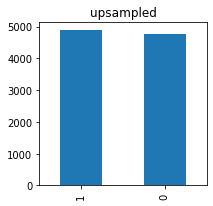

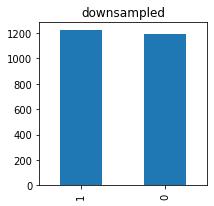

In [46]:
# Балансируем классы 2 способами 
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat=4, up_class=1)
features_downsampled, target_downsampled = downsample(features_train, target_train, fraction=0.25, down_class=0)

# Смотрим результат
target_upsampled.value_counts().plot.bar(title='upsampled', figsize=(3, 3))
plt.show()
target_downsampled.value_counts().plot.bar(title='downsampled', figsize=(3, 3))
plt.show() 

Как видим, классы стали почти идеально сбалансированы любым способом. Далее проведем серию экспериментов, используя раздичные методы балансировки классов и проверим результат на разных моделях. Лучшую конфигурацию возьмем в финальную реализацию.

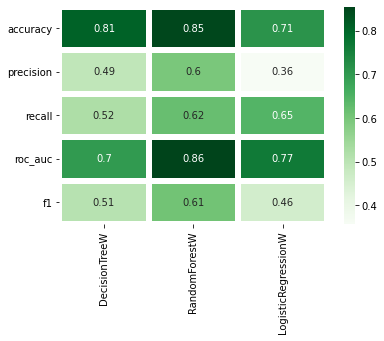

In [47]:
# взвешивание

r = {'DecisionTreeW': [0]*5, 'RandomForestW': [0]*5, 'LogisticRegressionW': [0]*5} # результирующий словарь

for depth in range(1, 16):
    model_dt_w = DecisionTreeClassifier(random_state=1234, class_weight='balanced') # решающее дерево с балансом
    model_dt_w.fit(features_train, target_train)
    pred = model_dt_w.predict_proba(features_valid)
    d = calculate_metrics(target_valid, pred)
    if d[-1] > r['DecisionTreeW'][-1]:
        r['DecisionTreeW'] = d

        
for est in range(10, 151, 10):    
    for depth in range(1, 16):
        model_rf_w = RandomForestClassifier(random_state=1234, max_depth=depth, n_estimators=est, class_weight='balanced') # случайный лес
        model_rf_w.fit(features_train, target_train)
        pred = model_rf_w.predict_proba(features_valid)
        d = calculate_metrics(target_valid, pred)
        if d[-1] > r['RandomForestW'][-1]:
            r['RandomForestW'] = d  
            
model_lr_w = LogisticRegression(random_state=1234, class_weight='balanced')      # логистическая регрессия   
model_lr_w.fit(features_train, target_train)
pred = model_lr_w.predict_proba(features_valid)
r['LogisticRegressionW'] = calculate_metrics(target_valid, pred)

# Выводим результат
res = pd.DataFrame(data=r, index=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])
sns.heatmap(res, annot=True, cmap='Greens', linewidth=5)
plt.yticks(rotation=0)
None

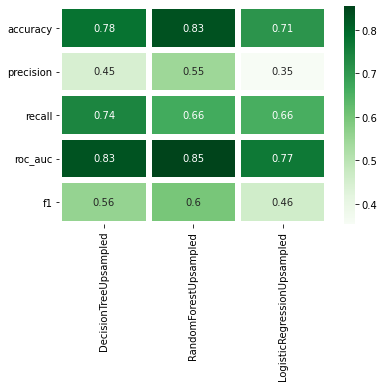

In [48]:
# увеличение выборки

r = {'DecisionTreeUpsampled': [0]*5, 'RandomForestUpsampled': [0]*5, 'LogisticRegressionUpsampled': [0]*5} # результирующий словарь

for depth in range(1, 16):
    model_dt0 = DecisionTreeClassifier(random_state=1234, max_depth=depth)  # решающее дерево
    model_dt0.fit(features_upsampled, target_upsampled)
    pred = model_dt0.predict_proba(features_valid)
    d = calculate_metrics(target_valid, pred)
    if d[-1] > r['DecisionTreeUpsampled'][-1]:
        r['DecisionTreeUpsampled'] = d
    
for est in range(10, 151, 10):    
    for depth in range(1, 16):
        model_rf0 = RandomForestClassifier(random_state=1234, max_depth=depth, n_estimators=est) # случайный лес
        model_rf0.fit(features_upsampled, target_upsampled)
        pred = model_rf0.predict_proba(features_valid)
        d = calculate_metrics(target_valid, pred)
        if d[-1] > r['RandomForestUpsampled'][-1]:
            r['RandomForestUpsampled'] = d    
            
model_lr0 = LogisticRegression(random_state=1234)      # логистическая регрессия   
model_lr0.fit(features_upsampled, target_upsampled)
pred = model_lr0.predict_proba(features_valid)
r['LogisticRegressionUpsampled'] = calculate_metrics(target_valid, pred)

# Выводим результат
res = pd.DataFrame(data=r, index=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])
sns.heatmap(res, annot=True, cmap='Greens', linewidth=5)
plt.yticks(rotation=0)
None

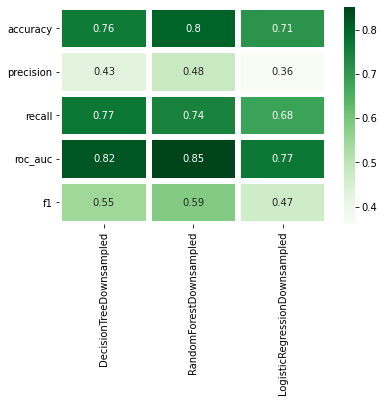

In [49]:
# уменьшение выборки

r = {'DecisionTreeDownsampled': [0]*5, 'RandomForestDownsampled': [0]*5, 'LogisticRegressionDownsampled': [0]*5} # результирующий словарь

for depth in range(1, 16):
    model_dt0 = DecisionTreeClassifier(random_state=1234, max_depth=depth)  # решающее дерево
    model_dt0.fit(features_downsampled, target_downsampled)
    pred = model_dt0.predict_proba(features_valid)
    d = calculate_metrics(target_valid, pred)
    if d[-1] > r['DecisionTreeDownsampled'][-1]:
        r['DecisionTreeDownsampled'] = d
    
for est in range(10, 151, 10):    
    for depth in range(1, 16):
        model_rf0 = RandomForestClassifier(random_state=1234, max_depth=depth, n_estimators=est) # случайный лес
        model_rf0.fit(features_downsampled, target_downsampled)
        pred = model_rf0.predict_proba(features_valid)
        d = calculate_metrics(target_valid, pred)
        if d[-1] > r['RandomForestDownsampled'][-1]:
            r['RandomForestDownsampled'] = d    
            
model_lr0 = LogisticRegression(random_state=1234)      # логистическая регрессия   
model_lr0.fit(features_downsampled, target_downsampled)
pred = model_lr0.predict_proba(features_valid)
r['LogisticRegressionDownsampled'] = calculate_metrics(target_valid, pred)

# Выводим результат
res = pd.DataFrame(data=r, index=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])
sns.heatmap(res, annot=True, cmap='Greens', linewidth=5)
plt.yticks(rotation=0)
None

In [50]:
# добавим в функцию расчета метрик параметр threshold

def calculate_metrics_thr(target, predict_proba, threshold):
    
    predict = (predict_proba[:, 1] > threshold).astype('int')
    
    accuracy = accuracy_score(target, predict)
    precision = precision_score(target, predict)
    recall = recall_score(target, predict)
    roc_auc = roc_auc_score(target, predict_proba[:, 1])
    f1 = f1_score(target, predict)

    return [accuracy, precision, recall, roc_auc, f1]

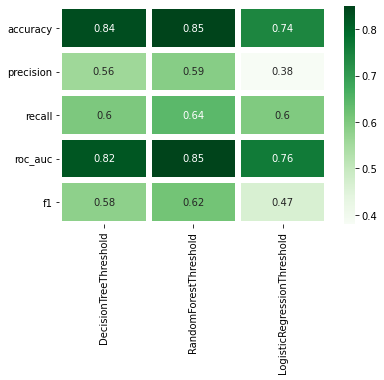

In [51]:
# изменение порога

r = {'DecisionTreeThreshold': [0]*5, 'RandomForestThreshold': [0]*5, 'LogisticRegressionThreshold': [0]*5} # результирующий словарь

# решающее дерево
for depth in range(1, 16):
    model_dt0 = DecisionTreeClassifier(random_state=1234, max_depth=depth) 
    model_dt0.fit(features_train, target_train)
    pred = model_dt0.predict_proba(features_valid)
    for th in np.linspace(0, 1, 100):
        d = calculate_metrics_thr(target_valid, pred, th)
        if d[-1] > r['DecisionTreeThreshold'][-1]:
            r['DecisionTreeThreshold'] = d

            
# случайный лес      
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model_rf0 = RandomForestClassifier(random_state=1234, max_depth=depth, n_estimators=est) # случайный лес
        model_rf0.fit(features_train, target_train)
        pred = model_rf0.predict_proba(features_valid) # вероятности классов
        for th in np.linspace(0, 1, 100):
            d = calculate_metrics_thr(target_valid, pred, th)
            if d[-1] > r['RandomForestThreshold'][-1]:
                r['RandomForestThreshold'] = d    

                
# логистическая регрессия
model_lr0 = LogisticRegression(random_state=1234)         
model_lr0.fit(features_train, target_train)
pred = model_lr0.predict_proba(features_valid)
for th in np.linspace(0, 1, 100):
    d = calculate_metrics_thr(target_valid, pred, th)
    if d[-1] > r['LogisticRegressionThreshold'][-1]:
        r['LogisticRegressionThreshold'] = d    

# Выводим результат
res = pd.DataFrame(data=r, index=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])
sns.heatmap(res, annot=True, cmap='Greens', linewidth=5)
plt.yticks(rotation=0)
None

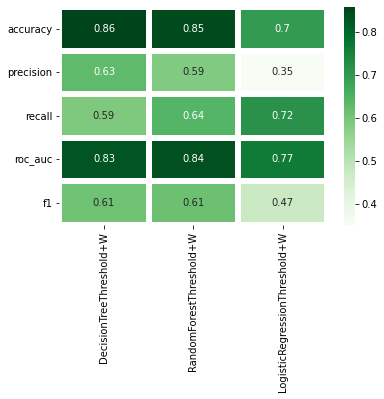

In [52]:
# изменение порога + взвешивание

r = {'DecisionTreeThreshold+W': [0]*5, 'RandomForestThreshold+W': [0]*5, 'LogisticRegressionThreshold+W': [0]*5} # результирующий словарь

# решающее дерево
for depth in range(1, 16):
    model_dt0 = DecisionTreeClassifier(random_state=1234, max_depth=depth, class_weight='balanced') 
    model_dt0.fit(features_train, target_train)
    pred = model_dt0.predict_proba(features_valid)
    for th in np.linspace(0, 1, 100):
        d = calculate_metrics_thr(target_valid, pred, th)
        if d[-1] > r['DecisionTreeThreshold+W'][-1]:
            r['DecisionTreeThreshold+W'] = d

            
# случайный лес      
for est in range(10, 151, 10):
    for depth in range(1, 16):
        model_rf0 = RandomForestClassifier(random_state=1234, max_depth=depth, n_estimators=est, class_weight='balanced') # случайный лес
        model_rf0.fit(features_train, target_train)
        pred = model_rf0.predict_proba(features_valid) # вероятности классов
        for th in np.linspace(0, 1, 100):
            d = calculate_metrics_thr(target_valid, pred, th)
            if d[-1] > r['RandomForestThreshold+W'][-1]:
                r['RandomForestThreshold+W'] = d    

                
# логистическая регрессия
model_lr0 = LogisticRegression(random_state=1234, class_weight='balanced')         
model_lr0.fit(features_train, target_train)
pred = model_lr0.predict_proba(features_valid)
for th in np.linspace(0, 1, 100):
    d = calculate_metrics_thr(target_valid, pred, th)
    if d[-1] > r['LogisticRegressionThreshold+W'][-1]:
        r['LogisticRegressionThreshold+W'] = d    

# Выводим результат
res = pd.DataFrame(data=r, index=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])
sns.heatmap(res, annot=True, cmap='Greens', linewidth=5)
plt.yticks(rotation=0)
None

Получили самый лучший результат f1 на сбалансированном случайном лесе.

**Вывод:** В результате проделанных экспериментов на выходе имеем 3 таблицы. Каждая таблица хранит метрики для различных моделей. В строках - метрики, в столбцах - методы балансировки: 

* none - без балансировки
* weight - взвешивание модели
* threshold - изменение порога
* th&weight - комбинирование взвешивания и изменения порога
* upsampled - увеличение выборки
* downsampled - уменшение выборки

Целевая метрика нашего иследования `f1` имеет самые высокие показатели в **сбалансированной модели случайного леса**

Используем данную конфигурацию в финальной модели. 

## Исследование финальной модели

Подберем гиперпараметры для финальной модели. Для этого используем фреймворк `optuna`, который специально под это заточен. Параметры, при которых f1 мера будет максимальной, будут финальными.

In [66]:
# Функция подбора гиперпараметров

def objective(trial):
    
# Задаем гиперпараметры

    rf_estimators = trial.suggest_int('rf_estimators', 10, 100, step=10)
    rf_max_depth = trial.suggest_int('rf_max_depth', 1, 15)
#     rf_max_features = trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None])
#     rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 8)
    rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 5) 
#     rf_bootstrap = trial.suggest_categorical('rf_bootstrap', [True, False])
#     rf_criterion =  trial.suggest_categorical('rf_criterion', ['gini', 'entropy'])

# Инициализируем модель

    classifier_obj = RandomForestClassifier(n_estimators=rf_estimators,
                                           max_depth=rf_max_depth,
#                                            max_features=rf_max_features,
#                                            min_samples_split=rf_min_samples_split,
                                           min_samples_leaf=rf_min_samples_leaf,
#                                            bootstrap=rf_bootstrap,
#                                            criterion=rf_criterion,
#                                            class_weight='balanced',
                                           random_state=12345)
    
# Тренируем модель, считаем f1 при разных порогах и фиксируем лучший результат
    f1 = 0
    classifier_obj.fit(features_train, target_train)
    pred_proba = classifier_obj.predict_proba(features_valid)
    for th in np.linspace(0, 1, 100):     
        preds = (pred_proba[:, 1] > th).astype('int')
        f1_inter = f1_score(target_valid, preds)     
        if f1_inter > f1:
            f1 = f1_inter
                
    return f1

In [56]:
# # Функция подбора гиперпараметров

# def objective(trial):
    
# # Задаем гиперпараметры

#     rf_estimators = trial.suggest_int('rf_estimators', 10, 100, step=10)
#     rf_max_depth = trial.suggest_int('rf_max_depth', 1, 15)
#     rf_max_features = trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None])
#     rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 8)
#     rf_min_samples_leaf = trial.suggest_int('rf_min_samples_leaf', 1, 5) 
#     rf_bootstrap = trial.suggest_categorical('rf_bootstrap', [True, False])
#     rf_criterion =  trial.suggest_categorical('rf_criterion', ['gini', 'entropy'])

# # Инициализируем модель

#     classifier_obj = RandomForestClassifier(n_estimators=rf_estimators,
#                                            max_depth=rf_max_depth,
#                                            max_features=rf_max_features,
#                                            min_samples_split=rf_min_samples_split,
#                                            min_samples_leaf=rf_min_samples_leaf,
#                                            bootstrap=rf_bootstrap,
#                                            criterion=rf_criterion,
#                                            class_weight='balanced',
#                                            random_state=12345)
    
# # Тренируем модель, считаем f1 при разных порогах и фиксируем лучший результат
#     f1 = 0

#     classifier_obj.fit(features_train, target_train)
#     for th in np.linspace(0, 1, 100):
#         pred_proba = classifier_obj.predict_proba(features_valid)
#         preds = (pred_proba[:, 1] > th).astype('int')
#         f1_inter = f1_score(target_valid, preds)
        
#         if f1_inter > f1:
#             f1 = f1_inter
                
#     return f1

In [67]:
# Запускаем оптуну

study = optuna.create_study(direction='maximize') # максимизируем целевую функцию
study.optimize(objective, n_trials=100, n_jobs=-1) # проводим 100 испытаний, используя все мощности

[I 2023-08-01 18:51:42,241] A new study created in memory with name: no-name-6f055aba-854d-45a0-81f8-1e8641aeeef4
[I 2023-08-01 18:51:49,567] Trial 2 finished with value: 0.5651537335285505 and parameters: {'rf_estimators': 10, 'rf_max_depth': 4, 'rf_min_samples_leaf': 2}. Best is trial 2 with value: 0.5651537335285505.
[I 2023-08-01 18:51:49,610] Trial 4 finished with value: 0.6031746031746033 and parameters: {'rf_estimators': 10, 'rf_max_depth': 8, 'rf_min_samples_leaf': 5}. Best is trial 4 with value: 0.6031746031746033.
[I 2023-08-01 18:51:50,312] Trial 0 finished with value: 0.5958549222797928 and parameters: {'rf_estimators': 20, 'rf_max_depth': 9, 'rf_min_samples_leaf': 1}. Best is trial 4 with value: 0.6031746031746033.
[I 2023-08-01 18:51:50,363] Trial 6 finished with value: 0.594885598923284 and parameters: {'rf_estimators': 20, 'rf_max_depth': 8, 'rf_min_samples_leaf': 3}. Best is trial 4 with value: 0.6031746031746033.
[I 2023-08-01 18:51:50,625] Trial 7 finished with value

In [71]:
study.best_value # лучший результат

0.6105263157894737

In [72]:
study.best_params # лучшие параметры

{'rf_estimators': 20, 'rf_max_depth': 9, 'rf_min_samples_leaf': 2}

In [76]:
# Обучим финальную модель и посмотрим метрики

# инициализация
final_model = RandomForestClassifier(n_estimators=50,
                                    max_depth=11,
#                                     max_features=None,
#                                     min_samples_split=7,
#                                     min_samples_leaf=4,
#                                     bootstrap=True,
#                                     criterion='gini',
                                    class_weight='balanced',
                                    random_state=12345)

# обучение и результат
res = [0]*5
f1 = 0
thr = 0

final_model.fit(features_train, target_train)
pred = final_model.predict_proba(features_valid)

for th in np.linspace(0, 1, 100):
    res_inter = calculate_metrics_thr(target_valid, pred, th)
    if res_inter[-1] > f1:
        f1 = res_inter[-1]
        res = res_inter
        thr = th

print('threshold', "{:.3f}".format(thr),
      '\n\naccuracy:', "{:.3f}".format(res[0]),
      '\nprecision:', "{:.3f}".format(res[1]),
      '\nrecall:', "{:.3f}".format(res[2]),
      '\nroc_auc', "{:.3f}".format(res[3]),
      '\nf1:', "{:.3f}".format(res[4]))

threshold 0.424 

accuracy: 0.836 
precision: 0.552 
recall: 0.668 
roc_auc 0.852 
f1: 0.604


In [61]:
# # Обучим финальную модель и посмотрим метрики

# # инициализация
# final_model = RandomForestClassifier(n_estimators=80,
#                                     max_depth=9,
#                                     max_features=None,
#                                     min_samples_split=7,
#                                     min_samples_leaf=4,
#                                     bootstrap=True,
#                                     criterion='gini',
#                                     class_weight='balanced',
#                                     random_state=12345)

# # обучение и результат
# res = [0]*5
# f1 = 0
# thr = 0

# final_model.fit(features_train, target_train)
# pred_proba = final_model.predict_proba(features_valid)

# for th in np.linspace(0, 1, 100):
#     preds = (pred_proba[:, 1] > th).astype('int')
#     res_inter = calculate_metrics(target_valid, preds)
        
#     if res_inter[-1] > f1:
#         f1 = res_inter[-1]
#         res = res_inter
#         thr = th

# print('threshold', "{:.3f}".format(thr),
#       '\n\naccuracy:', "{:.3f}".format(res[0]),
#       '\nprecision:', "{:.3f}".format(res[1]),
#       '\nrecall:', "{:.3f}".format(res[2]),
#       '\nroc_auc', "{:.3f}".format(res[3]),
#       '\nf1:', "{:.3f}".format(res[4]))

In [73]:
# проверка на адекватность

dumm_model = DummyClassifier(strategy='constant', constant=1)

dumm_model.fit(features_train, target_train)
pred_dumm = dumm_model.predict_proba(features_valid)
res_dumm = calculate_metrics(target_valid, pred_dumm)

print('accuracy:', "{:.3f}".format(res_dumm[0]),
      '\nprecision:', "{:.3f}".format(res_dumm[1]),
      '\nrecall:', "{:.3f}".format(res_dumm[2]),
      '\nroc_auc', "{:.3f}".format(res_dumm[3]),
      '\nf1:', "{:.3f}".format(res_dumm[4]))

accuracy: 0.188 
precision: 0.188 
recall: 1.000 
roc_auc 0.500 
f1: 0.316


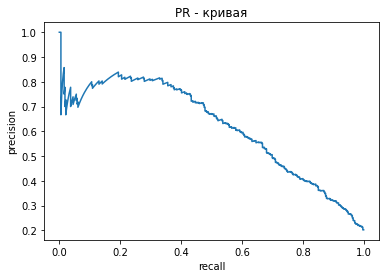

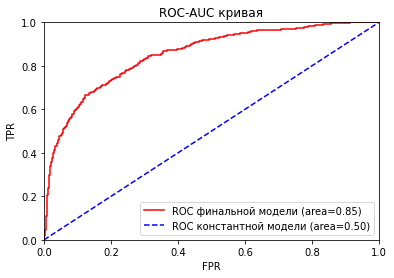

In [77]:
# Построим кривые качества

# PR - кривая
precision, recall, thresholds = precision_recall_curve(target_valid, pred[:, 1])
plt.plot(recall, precision)
plt.title('PR - кривая')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

# ROC-AUC кривая
# финальная модель
fpr, tpr, thresholds = roc_curve(target_valid, pred[:, 1])
fprd, tprd, td = roc_curve(target_valid, pred_dumm[:, 1])

plt.plot(fpr, tpr, 'r', label='ROC финальной модели (area={:.2f})'.format(res[-2]))
plt.title('ROC-AUC кривая')
plt.xlabel('FPR')
plt.ylabel('TPR')

# константная модель
plt.plot(fprd, tprd, 'b', linestyle='--',
         label='ROC константной модели (area={:.2f})'.format(res_dumm[-2]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

**Вывод**: в результате исследования финальной модели были подобраны оптимальные гиперпараметры, максимизирующие f1, определен порог, обучена финальная модель.

На валидации имеем значение ***f1 = 0.626*** (выше целевого значения 0.59) и ***ROC-AUC = 0.77***, что является показателем хорошего качества модели. 

Проверку на адекватность модель тоже прошла. ***ROC-AUC > 0.5*** а значит наша модель работает лучше константной.

**Вывод v2**: в результате исследования финальной модели были подобраны оптимальные гиперпараметры, максимизирующие f1, определен порог, обучена финальная модель.

На валидации имеем значение ***f1 = 0.604*** (выше целевого значения 0.59) и ***ROC-AUC = 0.85***, что является показателем хорошего качества модели. 

Проверку на адекватность модель тоже прошла. ***ROC-AUC > 0.5*** а значит наша модель работает лучше константной.

## Тестирование модели

In [78]:
# Тестируем финальную модель

pred = final_model.predict_proba(features_test)
# pred = (pred_proba[:, 1] >= thr).astype('int')

result = calculate_metrics_thr(target_test, pred, thr)

print('accuracy:', "{:.3f}".format(result[0]),
      '\nprecision:', "{:.3f}".format(result[1]),
      '\nrecall:', "{:.3f}".format(result[2]),
      '\nroc_auc', "{:.3f}".format(result[3]),
      '\nf1:', "{:.3f}".format(result[4]))

accuracy: 0.821 
precision: 0.582 
recall: 0.649 
roc_auc 0.844 
f1: 0.614


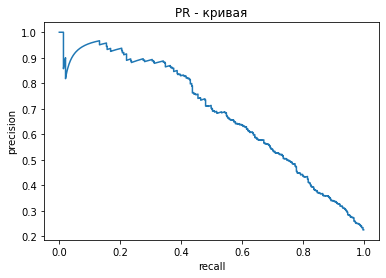

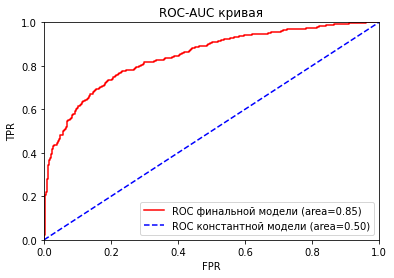

In [79]:
# Построим кривые качества

# PR - кривая
precision, recall, thresholds = precision_recall_curve(target_test, pred[:, 1])
plt.plot(recall, precision)
plt.title('PR - кривая')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

# ROC-AUC кривая
# финальная модель
fpr, tpr, thresholds = roc_curve(target_test, pred[:, 1])
fprd, tprd, td = roc_curve(target_test, dumm_model.predict(features_test))

plt.plot(fpr, tpr, 'r', label='ROC финальной модели (area={:.2f})'.format(res[-2]))
plt.title('ROC-AUC кривая')
plt.xlabel('FPR')
plt.ylabel('TPR')

# константная модель
plt.plot(fprd, tprd, 'b', linestyle='--',
         label='ROC константной модели (area={:.2f})'.format(res_dumm[-2]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

**Вывод:** На этапе тестирования модель довольно хорошо справилась, показатель f1 больше 0.59 а значит цель достигнута. ROC-AUC тоже больше 0,5, значит модель работает лучше константной.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Все так.
</div> 
   

## Общий вывод

*Цель проекта* - построить модель прогнозирования оттока клиентов из банка с максимальной F1-мерой не менее **0.59**. Эта цель достигнута - на тестовой выборке получена F1-мера **0.614**.


Для достижения цели были выполнены следующие шаги:
* Подготовка данных:
 - Исправлен формат столбцов, приведен к `snake_case`
 - Обработано **909** пропусков в столбце `tenure` путем случайного заполнения с равномерным распределением
 - Выполнено кодирование категориальных признаков (OHE)
 - Разбиение выборки на обучающую (60%), валидационную (20%) и тестовую (20%)
 
 
* Исследование задачи:
 - Выявлен ***дисбаланс классов*** - кол-во объектов класса 1 примерно в 4 раза меньше (чем класса 0)
 - При дисбалансе лучший результат **(F1 = 0.59)** показала модель случайного леса
 
 
* Борьба с дисбалансом:
 - Протестировано 6 методов балансировки на 3 моделях
 - Лучший результат (F1 = 0.60) дала модель ***`случайного леса с подбором порога`***
 
 
* Подбор гиперпараметров:
 - С помощью Optuna подобраны гиперпараметры, максимизирующие F1
 
 
* Тестирование:
 - На тесте получены метрики **F1 = 0.614, ROC-AUC = 0.85**
 - Дополнительно сравнивались метрики F1 и ROC-AUC. Значение ROC-AUC 0.85 также указывает на хорошее качество модели.


**Итог**: построена модель, соответствующая цели проекта по качеству на тестовой выборке.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*